In [295]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from pandas.api.types import is_string_dtype, is_numeric_dtype


In [296]:
# import dataSets
train=pd.read_csv('Resource/train.csv')

test=pd.read_csv('Resource/test.csv')

gender=pd.read_csv('Resource/gender_submission.csv')

test=pd.merge(test , gender,how='left', on='PassengerId')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [298]:
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [299]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [300]:
# check test dataSet
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [301]:
# check Survived per Pclass

train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

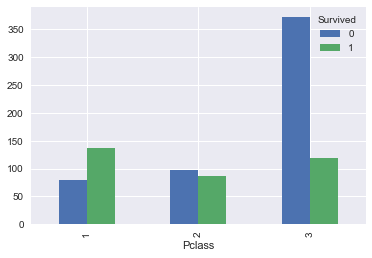

In [302]:

train.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar')

### most survival are on class 1 and class 3 has more death rate

lets check the survial rate on each class 

In [303]:
train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


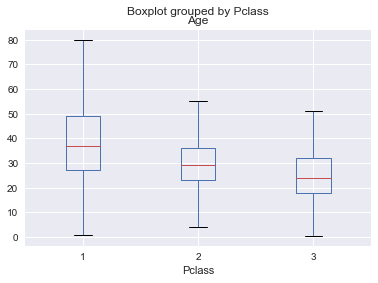

In [304]:
# boxplot to see age 
train.boxplot(column='Age' , by='Pclass',showfliers=True)

## Seaborn boxplot gives us better visualization

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


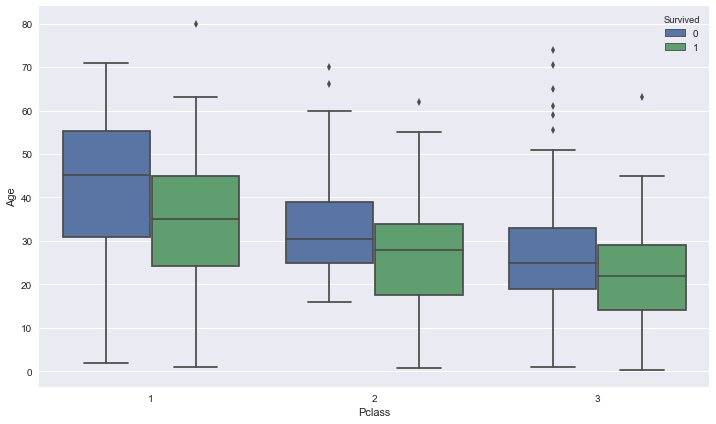

In [305]:
# using Seaborn boxplot
plt.figure(figsize=(12,7))
sns.boxplot(train.Pclass,train.Age, hue=train.Survived)

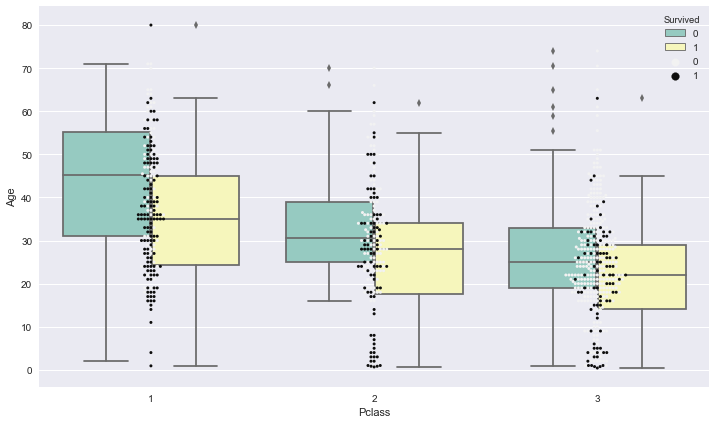

In [306]:
# to see records in more detail
plt.figure(figsize=(12,7))
ax = sns.boxplot(x="Pclass", y="Age", hue="Survived",data=train, palette="Set3")
ax = sns.swarmplot(x="Pclass", y="Age", hue="Survived",data=train, size=3,color=".05")

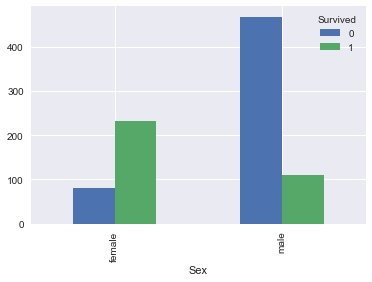

In [307]:
train.groupby('Sex')['Survived'].value_counts().unstack().plot(kind='bar')


In [308]:
train.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


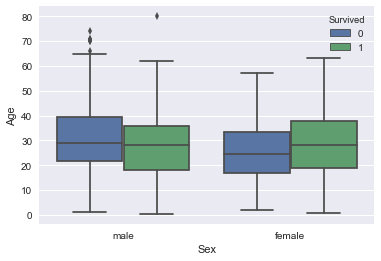

In [309]:
sns.boxplot(train.Sex, train.Age, hue=train.Survived)

# younger men and older women survived

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Age in each Class')

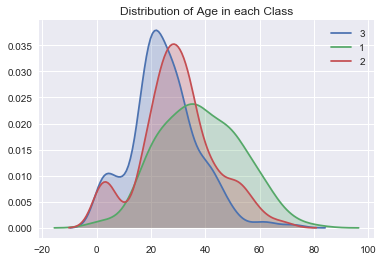

In [310]:
# see distribution 
for i in train.Pclass.unique():
    sns.kdeplot(train[train.Pclass==i]['Age'], shade=True,label=i)
    
plt.title('Distribution of Age in each Class')

In [311]:
from ipywidgets import interact


def ploter(i):
    train[train['Pclass']==i].groupby('Sex').Survived.value_counts().unstack().plot(kind='bar')
    
i=[1,2,3]
    
interact(ploter, i=[1,2,3])





interactive(children=(Dropdown(description='i', options=(1, 2, 3), value=1), Output()), _dom_classes=('widget-…

<function __main__.ploter(i)>

In [312]:
train.shape , test.shape

((891, 12), (418, 12))

In [313]:
# find the null Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Null Value on each column')

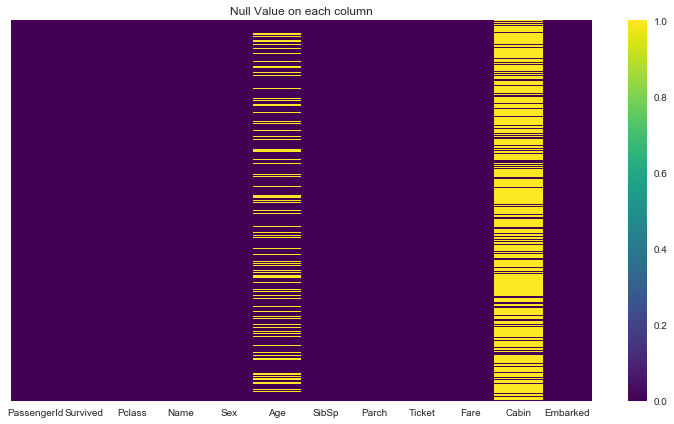

In [314]:
# visualized null data in each column
plt.figure(figsize=(13,7))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.title('Null Value on each column')

In [315]:
# fill Null / NaN on Age column with mean age
train.fillna(value=train.Age.mean(), inplace =True)
test.fillna(value=test.Age.mean(), inplace=True)

In [316]:
# We can't replace Nan with Mean , this time we need to find the mode on Embarked column

# 2 methds

train['Embarked'].value_counts()
print ('the most Port of Embarkation',train['Embarked'].mode())

the most Port of Embarkation 0    S
dtype: object


In [317]:
# so we replace Port of Embarkation with S
train.fillna(value=train['Embarked'].mode(),inplace=True)
test.fillna(value=test['Embarked'].mode(),inplace=True)

In [318]:
train.shape , test.shape

((891, 12), (418, 12))

In [319]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [320]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [321]:
# below code check if the value is category change it category code
Train=train.drop(['PassengerId','Survived','Name','Fare'], axis=1)
for col,val in Train.items():
    if is_string_dtype(val): Train[f'{col}']=Train[f'{col}'].astype('category').cat.codes

In [322]:
Test=test.drop(['PassengerId','Survived','Name','Fare'], axis=1)
for col,val in Test.items():
    if is_string_dtype(val): Test[f'{col}']=Test[f'{col}'].astype('category').cat.codes

In [323]:
Train.shape , Test.shape

((891, 7), (418, 7))

In [324]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=50, min_samples_leaf=3,max_features=0.5, n_jobs=-1, oob_score=True )
RF.fit(Train, train.Survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [325]:
RF.score(Train, train.Survived)

0.9079685746352413

In [326]:
RF.score(Test, test.Survived)

0.9114832535885168

In [327]:

Prediction=RF.predict(Test)


In [330]:
answer=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':Prediction})

In [331]:
answer.to_csv('4thsubmission.csv', index=False)

In [332]:
list(zip(Train.columns ,RF.feature_importances_))

[('Pclass', 0.11761861224837138),
 ('Sex', 0.3869514592048929),
 ('Age', 0.15512137086648212),
 ('SibSp', 0.05188421924335725),
 ('Parch', 0.028942847244455266),
 ('Ticket', 0.23294624898937638),
 ('Embarked', 0.02653524220306458)]

In [458]:
# encode categorical Variables (Gender(Sex) and Embarked)

train=pd.get_dummies(train,columns=['Sex', 'Embarked'], drop_first=True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,29.6991,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,29.6991,0,0,0,1


In [459]:
test=pd.get_dummies(test,columns=['Sex', 'Embarked'], drop_first=True)
test.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,30.2726,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,30.2726,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,30.2726,0,1,1,0


In [460]:
# define X and y  ( remove Vars:  name , fare , ticket, passemgerID)
X_train=train.iloc[:,[2,4,5,6,10,12,13]].values
X_test=test.iloc[:, [1,3,4,5,10,11,12]].values


# Response Variable

y_test=test['Survived']

y_train=train['Survived']

In [461]:
# scaling all Values

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

s_X_train=scaler.fit_transform(X_train)

s_X_test=scaler.transform(X_test)

In [462]:
# import Model and scoring

from sklearn.linear_model import LogisticRegression

LogModel=LogisticRegression()

LogModel.fit(s_X_train, y_train)

print ('Score:', LogModel.score(s_X_test,y_test))

Score: 0.9425837320574163


In [463]:
#  confusion Matrix - Type I & II error

from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(y_test, LogModel.predict(s_X_test))

matrix


array([[252,  14],
       [ 10, 142]])

In [464]:
# lets Check with test actual data

test['Survived1']= LogModel.predict(s_X_test)

In [465]:
# number of incorrect prediction  (its also shows on Confusion Matrix)
test[test.Survived!=test.Survived1].shape[0]

24

## Using P-Values to remove insignificant Vars and improve prediciton (backward elimination)

In [466]:
import statsmodels.tools as st

import statsmodels.formula.api as sm

In [467]:
# import statsmodels.tools as st
# s_X_train=st.add_constant(s_X_train, prepend=True, has_constant='skip')


## now we check P-value and then we remove high p-value from X

In [469]:
X_optimal= s_X_train[:, [0,1,2,3,4,5,6]]
model_ols=sm.OLS(endog=y_train , exog= X_optimal).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     41.01
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           3.96e-50
Time:                        01:50:49   Log-Likelihood:                -712.42
No. Observations:                 891   AIC:                             1439.
Df Residuals:                     884   BIC:                             1472.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1514      0.021     -7.363      0.0

### X7 and X2 hae high p-value and it's for Age and Embarked_S if we remove this we need to remove both Embarked

In [471]:
## removing X7 and X6  which mean 5 ,6 on list


X_optimal= s_X_train[:, [0,1,2,3,4]] 
#  OLS is A simple ordinary least squares model.
model_ols=sm.OLS(endog=y_train, exog= X_optimal).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     56.77
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           2.87e-51
Time:                        01:51:19   Log-Likelihood:                -713.88
No. Observations:                 891   AIC:                             1438.
Df Residuals:                     886   BIC:                             1462.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1537      0.019     -7.887      0.0

In [472]:
# X4 also has high p-value # removing number 3 on list


X_optimal= s_X_train[:, [0,2,4,6]]
#  OLS is A simple ordinary least squares model.
model_ols=sm.OLS(endog=y_train, exog= X_optimal).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     67.10
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           1.25e-49
Time:                        01:51:27   Log-Likelihood:                -719.92
No. Observations:                 891   AIC:                             1448.
Df Residuals:                     887   BIC:                             1467.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1267      0.019     -6.843      0.0

# lets check the model with new variables  
### (s_X_train[:, [0,1,2,4]] )

In [277]:
# we only get index = 0,1,2 and 4 from previous train and also the same on test
# define X and y  ( remove Vars:  name , fare , ticket, passemgerID)
X_train=train.iloc[:,[2,4,5,6,10]].values
X_test=test.iloc[:, [1,3,4,5,10]].values


# Response Variable

y_test=test['Survived']

y_train=train['Survived']

In [278]:
# scaling all Values

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

s_X_train=scaler.fit_transform(X_train)

s_X_test=scaler.transform(X_test)

# import Model and scoring

from sklearn.linear_model import LogisticRegression

LogModel=LogisticRegression()

LogModel.fit(s_X_train, y_train)

print ('Score:', LogModel.score(s_X_test,y_test))

#  confusion Matrix - Type I & II error

from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(y_test, LogModel.predict(s_X_test))
print ('Confusion Matrix')
print (matrix)

Score: 0.9401913875598086
Confusion Matrix
[[250  16]
 [  9 143]]
